# Importing Liabraries


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import minimize

# Loading Dataset 

In [6]:
df = pd.read_csv("Bengaluru_House_Data.csv")
print(df)

       area  bedrooms   price
0    1056.0         2   39.07
1    2600.0         5  120.00
2    1440.0         2   62.00
3    1521.0         3   95.00
4    1200.0         2   51.00
..      ...       ...     ...
294  1425.0         2   70.00
295  1450.0         3  100.00
296  1847.0         3  105.00
297  1100.0         2   45.00
298   525.0         1   26.00

[299 rows x 3 columns]


# Scaling Factor

In [7]:
#The dataset should be Scaled before Training and dropping the target variable as Price


sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X= sx.fit_transform(df.drop('price' , axis='columns'))
scaled_X

scaled_Y= sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_Y

array([[0.03747664],
       [0.14552737],
       [0.06809079],
       [0.11214953],
       [0.05340454],
       [0.03604806],
       [0.2576769 ],
       [0.78638184],
       [0.06975968],
       [0.47930574],
       [0.0787717 ],
       [0.37917223],
       [0.03604806],
       [0.03871829],
       [0.18291055],
       [0.08344459],
       [0.0493992 ],
       [0.06542056],
       [0.37249666],
       [0.0493992 ],
       [0.00534045],
       [0.1481976 ],
       [0.49265688],
       [0.12283044],
       [0.01902537],
       [0.06008011],
       [0.01615487],
       [0.09345794],
       [0.05042724],
       [0.04806409],
       [0.23364486],
       [0.03204272],
       [0.14953271],
       [0.06193591],
       [0.15220294],
       [0.03337784],
       [0.04606142],
       [0.15220294],
       [0.06024032],
       [0.04539386],
       [0.09345794],
       [0.03604806],
       [0.03604806],
       [0.0493992 ],
       [0.10786382],
       [0.25233645],
       [0.0293725 ],
       [0.111

# Newton Method

In [8]:
def newton_method(X, y_true, epochs, learning_rate=0.01):
    number = X.shape[1]
    w = np.ones(shape=(number,))
    b = 0
    
    def objective_function(w, b, X, y_true):
        y_pred = np.dot(X, w) + b
        return np.mean((y_true - y_pred) ** 2)
    
    def gradient(w, b, X, y_true):
        y_pred = np.dot(X, w) + b
        w_grad = -(2 / X.shape[0]) * np.dot(X.T, (y_true - y_pred))
        b_grad = -(2 / X.shape[0]) * np.sum(y_true - y_pred)
        return w_grad, b_grad
    
    def hessian(X):
        return (2 / X.shape[0]) * np.dot(X.T, X)
    
    cost_list = []
    epoch_list = []
    
    for epoch in range(epochs):
        w_grad, b_grad = gradient(w, b, X, y_true)
        H = hessian(X)
        w_hessian_inv = np.linalg.inv(H)
        
        # Update weights and bias using Newton's method
        w -= learning_rate * np.dot(w_hessian_inv, w_grad)
        b -= learning_rate * b_grad
        
        # Calculate cost
        cost = objective_function(w, b, X, y_true)
        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(epoch)
    
    return w, b, cost, cost_list, epoch_list

# Example usage
w_newton, b_newton, cost_newton, cost_list_newton, epoch_list_newton = newton_method(scaled_X, scaled_Y.reshape(-1,), epochs=100)
print("Newton Method Weights:", w_newton)
print("Newton Method Bias:", b_newton)
print("Newton Method Final Cost:", cost_newton)


Newton Method Weights: [0.87524708 0.54626896]
Newton Method Bias: -0.1938958723551476
Newton Method Final Cost: 0.016199148045335926


# Broyden-Fletcher-Goldfarb-Shanno

In [9]:
def objective_function(w_b, X, y_true):
    w = w_b[:-1]
    b = w_b[-1]
    y_pred = np.dot(X, w) + b
    return np.mean((y_true - y_pred) ** 2)

def gradient(w_b, X, y_true):
    w = w_b[:-1]
    b = w_b[-1]
    y_pred = np.dot(X, w) + b
    w_grad = -(2 / X.shape[0]) * np.dot(X.T, (y_true - y_pred))
    b_grad = -(2 / X.shape[0]) * np.sum(y_true - y_pred)
    return np.concatenate([w_grad, [b_grad]])

def bfgs_optimization(X, y_true):
    number = X.shape[1]
    w_b_initial = np.ones(number + 1)
    result = minimize(
        fun=objective_function,
        x0=w_b_initial,
        args=(X, y_true),
        jac=gradient,
        method='BFGS'
    )
    w_b_opt = result.x
    w = w_b_opt[:-1]
    b = w_b_opt[-1]
    cost = result.fun
    return w, b, cost

# Example usage
w_bfgs, b_bfgs, cost_bfgs = bfgs_optimization(scaled_X, scaled_Y.reshape(-1,))
print("BFGS Weights:", w_bfgs)
print("BFGS Bias:", b_bfgs)
print("BFGS Final Cost:", cost_bfgs)


BFGS Weights: [0.51664705 0.17197836]
BFGS Bias: -0.03585552849775953
BFGS Final Cost: 0.006220640675080779


# Limited-memory Broyden-Fletcher-Goldfarb-Shanno

In [10]:
def lbfgs_optimization(X, y_true):
    number = X.shape[1]
    w_b_initial = np.ones(number + 1)
    result = minimize(
        fun=objective_function,
        x0=w_b_initial,
        args=(X, y_true),
        jac=gradient,
        method='L-BFGS-B'
    )
    w_b_opt = result.x
    w = w_b_opt[:-1]
    b = w_b_opt[-1]
    cost = result.fun
    return w, b, cost

# Example usage
w_lbfgs, b_lbfgs, cost_lbfgs = lbfgs_optimization(scaled_X, scaled_Y.reshape(-1,))
print("L-BFGS Weights:", w_lbfgs)
print("L-BFGS Bias:", b_lbfgs)
print("L-BFGS Final Cost:", cost_lbfgs)


L-BFGS Weights: [0.51663725 0.1719845 ]
L-BFGS Bias: -0.03585320005765706
L-BFGS Final Cost: 0.0062206406700436295


# Comparing 3 Algorithms

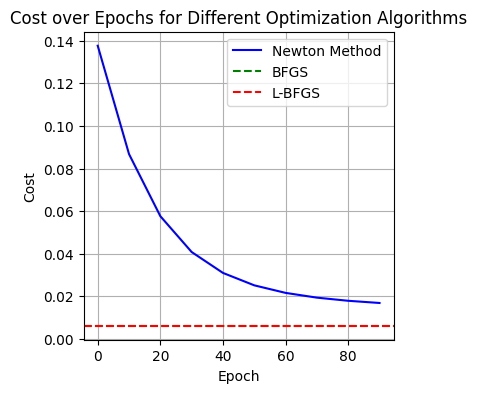

Newton Method Final Cost: 0.0162
BFGS Final Cost: 0.0062
L-BFGS Final Cost: 0.0062


In [12]:
plt.figure(figsize=(4,4))
plt.plot(epoch_list_newton, cost_list_newton, label='Newton Method', color='blue')
plt.axhline(y=cost_bfgs, color='green', linestyle='--', label='BFGS')
plt.axhline(y=cost_lbfgs, color='red', linestyle='--', label='L-BFGS')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost over Epochs for Different Optimization Algorithms')
plt.legend()
plt.grid(True)
plt.show()

# Display final costs for comparison
print(f"Newton Method Final Cost: {cost_newton:.4f}")
print(f"BFGS Final Cost: {cost_bfgs:.4f}")
print(f"L-BFGS Final Cost: {cost_lbfgs:.4f}")
